# Rental Bike Demand Case Study

**Version:** 1.0

---

**Document Information:**
- **Authors:** Ganesh Visweswaran
- **Creation Date:** June 23rd, 2024
- **Last Update Date:** June 26th, 2024
- **Last Updated by:** [Update by Name/Initials]

In [1]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as pt
%matplotlib inline
import seaborn as sns
import sklearn

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Importing RFE and LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

import statsmodels.api as sm 


In [2]:
print("Pandas version:", pd.__version__)
print("Numpy version:", np.__version__)
print("Seaborn version:", sns.__version__)
print("Matplotlib version:", pt.matplotlib.__version__)
print("statsmodel version:", sm.__version__)
print(f"The Scikit-Learn version is {sklearn.__version__}")



Pandas version: 2.1.4
Numpy version: 1.24.3
Seaborn version: 0.13.2
Matplotlib version: 3.8.0
statsmodel version: 0.14.0
The Scikit-Learn version is 1.1.3


In [3]:
#Reading file
bk=pd.read_csv('https://ml-course2-upgrad.s3.amazonaws.com/Linear+Regression+Assignment/Bike+Sharing+Assignment/day.csv')
bk.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bk.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- NO NULL VALUES

In [5]:
bk.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## Section 1: Exploratory Data Analysis
Instant is just unique identifier. Hence not useful for modelling for bike demand<br/>
Month and year info is already available in 'yr' and 'mnth' column. this is a duplicate info. hence not required<br/>
cnt is sum of casual and regisered. Demand is modelled against total count. Hence casual and registered users column is duplicate info. 


In [6]:
# Dropping duplicate and non-useful columns for total bike rent demand analysis
bk.drop(columns=['dteday','instant','casual','registered'], inplace=True)






In [7]:
#Defining Numerical and categorical features
num_col=['temp','atemp','hum','windspeed','cnt']
cat_col=['season','yr','mnth','holiday','weekday','weathersit','workingday']

## 1.1 Univariable Analysis
Numerical Variable Analysis

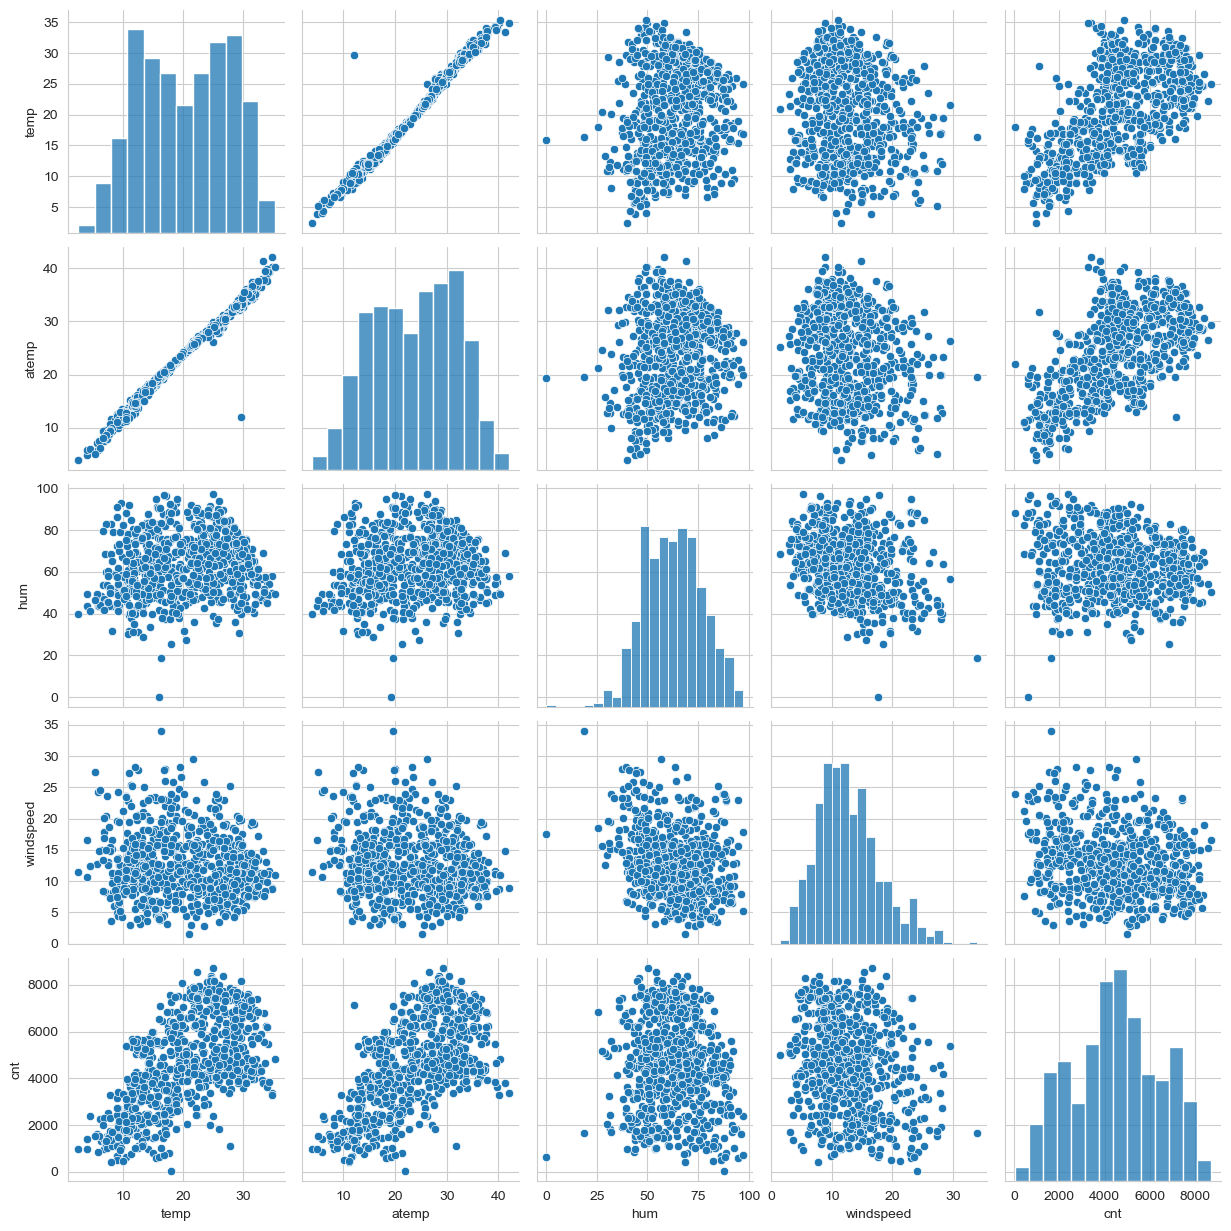

In [8]:

sns.set_style('whitegrid')
sns.pairplot(bk[num_col])
pt.show()

- Temperature very clear follows a linear regression pattern.

## 1.2 Bivariable Analysis
Categorical variable vs bike demand

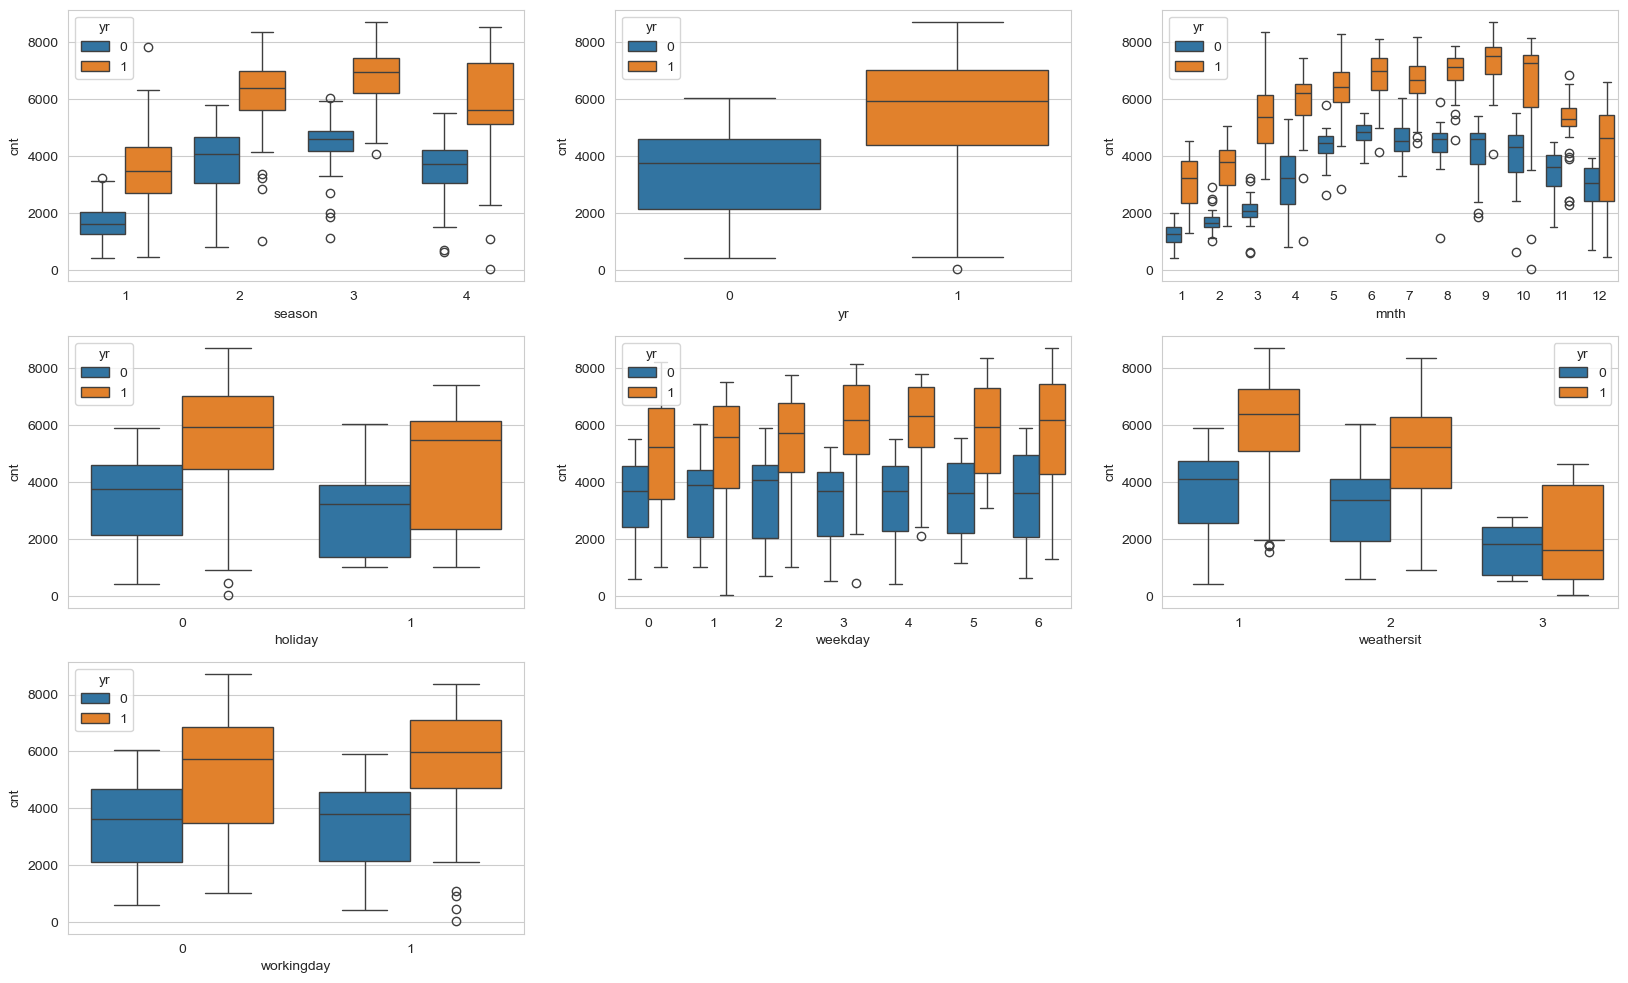

In [9]:
pt.figure(figsize=(20, 12))
i=1
for j in cat_col:
    pt.subplot(3,3,i)
    sns.boxplot(x = j, y = 'cnt', hue='yr', data = bk)
    i=i+1
pt.show()

- Summer and Fall have higher demand of bikes than other seasons<br/>
- 2019 has improvement in bike demand than 2018<br/>
- Demand is low during Holidays<br/>
- Bike demand is very low during snowy weather


In [10]:
# season and mnth follow same pattern and convey same relationship. wise to drop of one of them
# weekday's mean for cnt is always same. specific weekday do not have much impact on cnt

In [11]:
bk.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,1600


## Section 2 Preparing Data Frame for Modelling

### 2.1 Creating Dummy variable for categorical variables

In [12]:
#create dummy variable for weathersit
weathersit = pd.get_dummies(bk['weathersit'])
weathersit.drop(columns=[3],inplace=True)
weathersit.rename(columns={1:'Clear',2:'Misty'},inplace=True)
weathersit.head()

,Clear,Misty
0,False,True
1,False,True
2,True,False
3,True,False
4,True,False


10 - Clear, Few clouds, Partly cloudy, Partly cloudy<br/>
01 - Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist<br/>
00 - Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds

In [13]:
#create dummy variable for season
season = pd.get_dummies(bk['season'],drop_first=True)
season.rename(columns={2:'summer',3:'fall',4:'winter'},inplace=True)
season.head()

,summer,fall,winter
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


000 - spring<br/>
100 - summer<br/>
010 - fall<br/>
001 - winter

In [14]:
# Merge dummy variables to bike dataframe
bk = pd.concat([bk, season, weathersit], axis = 1)


In [15]:
#drop season and weathersit as they are not required
bk.drop(columns=['season','weathersit'],inplace=True)
bk.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear,Misty
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,False,False,False,False,True
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,False,False,False,False,True
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,False,False,False,True,False
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,False,False,False,True,False
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,False,False,False,True,False


In [16]:
# For Modelling purposes, boolean values are converted to integers
varlist=['Clear','Misty','fall','summer','winter']

for i in varlist:
    bk[i] = bk[i].replace({True: 1, False: 0})

bk.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear,Misty
0,0,1,0,6,0,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,1
1,0,1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,1
2,0,1,0,1,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,1,0
3,0,1,0,2,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,1,0
4,0,1,0,3,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,1,0


## 2.2 Create train and test data sets

In [17]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(bk, train_size = 0.7, test_size = 0.3, random_state = 100)

## 2.3 Normalization of all columns except columns with boolean values (1,0)

In [18]:
scaler = MinMaxScaler()
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['weekday', 'temp', 'atemp', 'hum', 'windspeed','cnt','mnth']
df_train[num_vars] = scaler.fit_transform(df_train[num_vars])
df_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear,Misty
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0.864243,0,0,1,1,0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0.827658,0,1,0,1,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0.465255,0,0,0,0,1
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0.204096,0,0,0,1,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,0.482973,1,0,0,0,1


In [19]:
df_train.describe()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,cnt,summer,fall,winter,Clear,Misty
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.00000,510.000000,510.000000
mean,0.507843,0.504456,0.025490,0.498366,0.676471,0.537262,0.512989,0.650369,0.320768,0.513620,0.245098,0.262745,0.24902,0.627451,0.343137
std,0.500429,0.315338,0.157763,0.336182,0.468282,0.225844,0.212385,0.145882,0.169797,0.224593,0.430568,0.440557,0.43287,0.483958,0.475223
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,0.000000,0.181818,0.000000,0.166667,0.000000,0.339853,0.332086,0.538643,0.199179,0.356420,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1.000000,0.545455,0.000000,0.500000,1.000000,0.540519,0.526811,0.653714,0.296763,0.518638,0.000000,0.000000,0.00000,1.000000,0.000000
75%,1.000000,0.818182,0.000000,0.833333,1.000000,0.735215,0.688457,0.754830,0.414447,0.684710,0.000000,1.000000,0.00000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [20]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 510 entries, 653 to 79
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   yr          510 non-null    int64  
 1   mnth        510 non-null    float64
 2   holiday     510 non-null    int64  
 3   weekday     510 non-null    float64
 4   workingday  510 non-null    int64  
 5   temp        510 non-null    float64
 6   atemp       510 non-null    float64
 7   hum         510 non-null    float64
 8   windspeed   510 non-null    float64
 9   cnt         510 non-null    float64
 10  summer      510 non-null    int64  
 11  fall        510 non-null    int64  
 12  winter      510 non-null    int64  
 13  Clear       510 non-null    int64  
 14  Misty       510 non-null    int64  
dtypes: float64(7), int64(8)
memory usage: 63.8 KB


### Heat Matrix on train dataset for validating corelation between variables

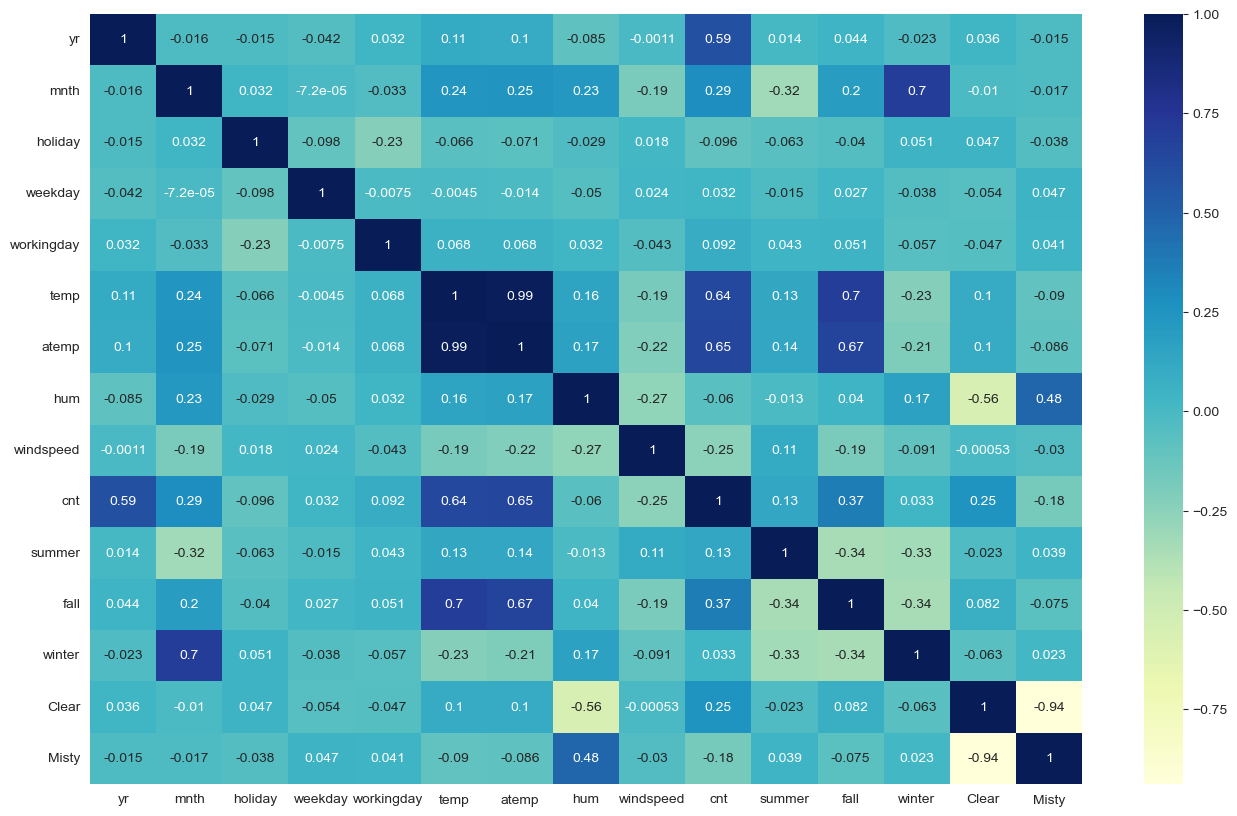

In [21]:
# Let's check the correlation coefficients to see which variables are highly correlated

pt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
pt.show()

- temp  have very high corelation with bike demand<br/>
- Fall season has very high bike demand

### 2.4 Create y and x train dataset

In [22]:

y_train = df_train.pop('cnt')
X_train=df_train
X_train.head()

,yr,mnth,holiday,weekday,workingday,temp,atemp,hum,windspeed,summer,fall,winter,Clear,Misty
653,1,0.818182,0,0.333333,1,0.509887,0.501133,0.575354,0.300794,0,0,1,1,0
576,1,0.545455,0,0.333333,1,0.815169,0.766351,0.725633,0.264686,0,1,0,1,0
426,1,0.181818,0,1.000000,0,0.442393,0.438975,0.640189,0.255342,0,0,0,0,1
728,1,1.000000,0,0.000000,0,0.245101,0.200348,0.498067,0.663106,0,0,0,1,0
482,1,0.272727,0,1.000000,0,0.395666,0.391735,0.504508,0.188475,1,0,0,0,1


## Section 3 Linear Regression Modelling

### 3.1 Model Creation using RFE

In [23]:
# Running RFE with the output number of the variable equal to 10
lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=10)             # running RFE
rfe = rfe.fit(X_train, y_train)

In [24]:
#List ranking of features
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('mnth', False, 5),
 ('holiday', True, 1),
 ('weekday', False, 3),
 ('workingday', False, 4),
 ('temp', True, 1),
 ('atemp', False, 2),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('summer', True, 1),
 ('fall', True, 1),
 ('winter', True, 1),
 ('Clear', True, 1),
 ('Misty', True, 1)]

In [25]:
# Top 10 features for modelling
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall', 'winter',
       'Clear', 'Misty'],
      dtype='object')

In [26]:
# Features removed from Modelling
X_train.columns[~rfe.support_]

Index(['mnth', 'weekday', 'workingday', 'atemp'], dtype='object')

In [27]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

# Adding a constant variable 
X_train_rfe = sm.add_constant(X_train_rfe)

lm = sm.OLS(y_train,X_train_rfe).fit()   # Running the linear model

#Let's see the summary of our linear model
print(lm.summary())





                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.827
Model:                            OLS   Adj. R-squared:                  0.824
Method:                 Least Squares   F-statistic:                     238.8
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.78e-183
Time:                        20:16:18   Log-Likelihood:                 486.16
No. Observations:                 510   AIC:                            -950.3
Df Residuals:                     499   BIC:                            -903.7
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0231      0.045     -0.517      0.6

Model Explain 82.7% of bike demand
All features are significant for bike demand (P value < 0.5)

In [28]:
#Listing all features in the above model
X_train_rfe.columns

Index(['const', 'yr', 'holiday', 'temp', 'hum', 'windspeed', 'summer', 'fall',
       'winter', 'Clear', 'Misty'],
      dtype='object')

In [29]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

## 3.2 Multicollinearity Validation using VIF

In [30]:
# Calculate the VIFs for the new model
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,23.34
3,hum,17.98
8,Clear,9.79
9,Misty,7.31
6,fall,6.48
4,windspeed,4.16
5,summer,3.36
7,winter,2.48
0,yr,2.07
1,holiday,1.04


- Though Temperature has highest VIF, but based on Data Analysis.. it is significant variable. Hence remove second highest VIF variable - Humidity (hum)

In [31]:
X_train_rfe.drop(columns=['hum'],inplace=True)

Validating VIF post removing Humidity

In [32]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,19.84
7,Clear,7.55
5,fall,6.38
8,Misty,4.24
3,windspeed,4.11
4,summer,3.35
6,winter,2.36
0,yr,2.07
1,holiday,1.04


- Though Temperature has highest VIF, but based on Data Analysis.. it is significant variable. Hence remove second highest VIF feature - Clear 

In [33]:
X_train_rfe.drop(columns=['Clear'],inplace=True)

- Creating revised Model post removing Clear feature

In [34]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,14.12
5,fall,6.13
4,summer,3.32
3,windspeed,3.20
6,winter,2.35
0,yr,2.01
7,Misty,1.44
1,holiday,1.03


- Though Temperature has highest VIF, but based on Data Analysis.. it is significant variable. Hence remove second highest VIF feature - fall 

In [35]:
X_train_rfe.drop(columns=['fall'],inplace=True)

- Validating VIF post removing feature 'Fall'

In [36]:
X_train_new = X_train_rfe.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,temp,3.32
3,windspeed,2.97
0,yr,1.99
4,summer,1.50
6,Misty,1.44
5,winter,1.35
1,holiday,1.03


- VIF is less than 5 for above features<br/>

- Creating a revised model post removing high VIF features

In [37]:
X_train_lm = sm.add_constant(X_train[[ 'temp', 'yr' , 'windspeed', 'summer', 'Misty', 'winter', 'holiday']])


lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.776
Model:                            OLS   Adj. R-squared:                  0.773
Method:                 Least Squares   F-statistic:                     248.9
Date:                Sun, 26 May 2024   Prob (F-statistic):          9.10e-159
Time:                        20:16:18   Log-Likelihood:                 420.40
No. Observations:                 510   AIC:                            -824.8
Df Residuals:                     502   BIC:                            -790.9
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1222      0.019      6.353      0.0

- Post removal of Multicollinear features using VIF, R2 Adjusted Score has dropped to 77% from 82%<br/>

- to improve R2 score, adding new feature which was earlier removed due to RFE ranking<br/>
Adding feature 'Weekday'

In [38]:
X_train_lm = sm.add_constant(X_train[[ 'temp', 'yr' , 'windspeed', 'summer', 'Misty', 'winter', 'holiday', 'weekday']])

lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.778
Method:                 Least Squares   F-statistic:                     224.1
Date:                Sun, 26 May 2024   Prob (F-statistic):          4.11e-160
Time:                        20:16:18   Log-Likelihood:                 426.42
No. Observations:                 510   AIC:                            -834.8
Df Residuals:                     501   BIC:                            -796.7
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0974      0.020      4.790      0.0

- R2 Adjusted value remains at 77% even after adding weekday <br/>

- Trying to replace 'Misty' weather feature with 'Clear' Weather feature to see any improvement in Model


In [39]:
X_train_lm = sm.add_constant(X_train[[ 'temp', 'yr' , 'windspeed', 'summer', 'Clear', 'winter', 'holiday','weekday']])


lr = sm.OLS(y_train, X_train_lm).fit()
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.802
Model:                            OLS   Adj. R-squared:                  0.799
Method:                 Least Squares   F-statistic:                     254.0
Date:                Sun, 26 May 2024   Prob (F-statistic):          7.10e-171
Time:                        20:16:18   Log-Likelihood:                 451.73
No. Observations:                 510   AIC:                            -885.5
Df Residuals:                     501   BIC:                            -847.3
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0168      0.020      0.858      0.3

- R2 Adjusted has improved from 78% to 80% <br/>

- Validating VIF for the features in the Model

In [40]:
X_train_new = X_train_lm.drop(['const'], axis=1)

vif = pd.DataFrame()
X = X_train_new
vif['Features'] = X.columns
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,temp,4.39
2,windspeed,3.38
7,weekday,2.80
4,Clear,2.55
1,yr,2.00
3,summer,1.49
5,winter,1.35
6,holiday,1.04


- VIF for all features on revised model is less than 5

## Section 4 Residual Error Analysis

In [41]:
#residual error analysis
y_train_cnt = lr.predict(X_train_lm)

Text(0.5, 0, 'Errors')

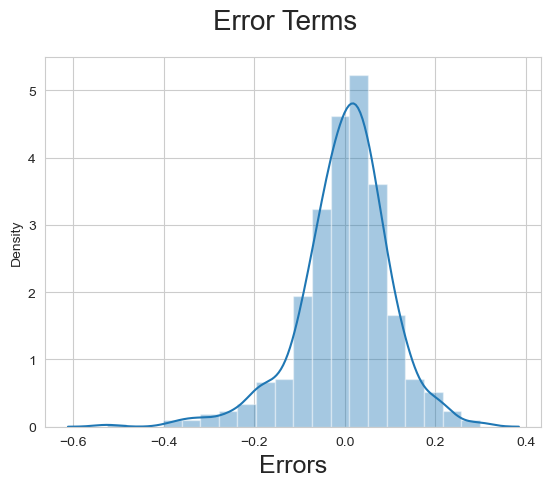

In [42]:
# Plot the histogram of the error terms
fig = pt.figure()
sns.distplot((y_train - y_train_cnt), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)                  # Plot heading 
pt.xlabel('Errors', fontsize = 18)     

- Mean value of Error Density is close to zero <br/>
- Error Density follows binomial distribution <br/>
- Hence the Linear Regression Model meets the criteria (assumptions)

## Section 5 Predict and Validate Model in test data

In [43]:
#features to be scalered similar to train dataset
num_vars = ['weekday', 'temp', 'atemp', 'hum', 'windspeed','cnt','mnth']


df_test[num_vars] = scaler.transform(df_test[num_vars])


- Predict Bike demand for test dataset using train dataset model

In [44]:
#Dividing into X_test and y_test
y_test = df_test.pop('cnt')
X_test = df_test

# Now let's use our model to make predictions.

# Creating X_test_new dataframe by dropping variables from X_test
X_test_new = X_test[X_train_new.columns]

# Adding a constant variable 
X_test_new = sm.add_constant(X_test_new)

# Making predictions
y_pred = lr.predict(X_test_new)

- Compare actual bike demand and predicted bike demand by model

Text(0, 0.5, 'y_pred')

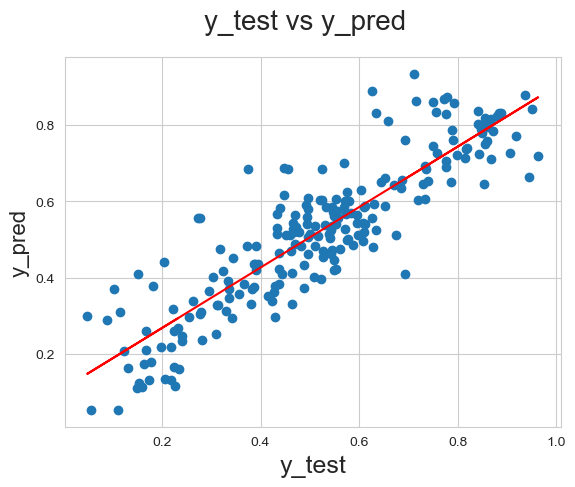

In [45]:
#Model Evaluation

# Plotting y_test and y_pred to understand the spread.
fig = pt.figure()
pt.scatter(y_test,y_pred)
m, b = np.polyfit(y_test,y_pred, 1)
pt.plot(y_test, m*y_test + b,'r')
fig.suptitle('y_test vs y_pred', fontsize=20)              # Plot heading
pt.xlabel('y_test', fontsize=18)                          # X-label
pt.ylabel('y_pred', fontsize=16)                          # Y-label

Predicted bike demand follows close to actual demand in test dataset

### R2 Score for Prediction on test dataset

In [46]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)
 

0.7816872263641474

In [47]:
#Linear Regression Model Feature - coefficients
lr.params

const        0.016755
temp         0.569401
yr           0.237103
windspeed   -0.187961
summer       0.078003
Clear        0.092325
winter       0.120680
holiday     -0.073795
weekday      0.051386
dtype: float64

## Linear Regression Model for Bike demand as follows
- Bike Demand = 0.016755 + (0.569401 *temp) + (0.237103 * yr) - (0.073795 * holiday) - (0.187961 * windspeed) + (0.078003 * summer) + (0.092325 * Clear) + (0.120680 * winter) - (0.092325 * weekday) <br/>

where<br/>
    yr : year (0: 2018, 1:2019)<br/>
    holiday: yes (1) or no (0)<br/>
    windspeed: windspeed<br/>
    summer: if season is summer, yes (1) or no (0)<br/>
    winter: if season is winter, yes (1) or no (0)<br/>
    Clear: if weather is Clear, yes (1) or no (0)<br/>
    weekday: weekday, 0 to 6 <br/>
    temp:  temperature<br/>

- Train Dataset R2 Score: 80% <br/>
- Test predicted R2 Score: 78%

- Temperature is very highly significant to  customer demand
- During Holidays and during misty/cold weather - demand is low
- There is significant improvement in customer demand in 2019
